In [26]:
# Load Yeast Protein Protein Interaction dataset
# - Exists as edge list
import numpy as np
import random

def load_edge_list(path, num_edges=2500):
    edge_list = open(path, 'r')
    edge_list = edge_list.readlines()
    edges = []
    nodes = []
    edge_list = random.sample(edge_list, num_edges)
    for edge in edge_list:
        edge = edge.replace("\n", "")
        edge_vals = edge.split("\t")
        edges.append((edge_vals[0], edge_vals[1]))
        nodes.append(edge_vals[0])
        nodes.append(edge_vals[1])
    
    nodes = list(set(nodes)) # Remove redundant values -> set object to list object
    return edges, nodes

In [27]:
edge_path = "yeast.reduced.edgelist"
edge_list, node_list = load_edge_list(edge_path)

# For annotation..
print("Number of edges : {}".format(len(edge_list)))
for i, edge in enumerate(edge_list):
    if i > 10: break
    print("Protein ID {:>10} is connected with Protein ID {:>10} in the Yeast PPI Graph.".format(edge[0],edge[1]))

Number of edges : 2500
Protein ID    YAL059W is connected with Protein ID    YBR239C in the Yeast PPI Graph.
Protein ID    YDR141C is connected with Protein ID    YGR003W in the Yeast PPI Graph.
Protein ID    YNL119W is connected with Protein ID    YLR005W in the Yeast PPI Graph.
Protein ID    YAR008W is connected with Protein ID    YLR262C in the Yeast PPI Graph.
Protein ID    YLL048C is connected with Protein ID    YOR242C in the Yeast PPI Graph.
Protein ID    YGL131C is connected with Protein ID    YOL039W in the Yeast PPI Graph.
Protein ID    YLR087C is connected with Protein ID    YNL255C in the Yeast PPI Graph.
Protein ID  YOR298C-A is connected with Protein ID    YNL216W in the Yeast PPI Graph.
Protein ID    YBL105C is connected with Protein ID    YJL210W in the Yeast PPI Graph.
Protein ID    YER159C is connected with Protein ID    YBL032W in the Yeast PPI Graph.
Protein ID    YDR477W is connected with Protein ID  YML100W-A in the Yeast PPI Graph.


In [28]:
# How to visualize the target PPI Graph?
# - Use NetworkX (Python Lib)
# - documents : https://networkx.github.io/documentation/stable/
import networkx as nx

# Make networkx graph object directly from edge list
raw_edge_list = open(edge_path, "r")
G = nx.Graph()
G = nx.parse_edgelist(raw_edge_list, delimiter='\t', create_using=G,nodetype=str, data=(('weight', float),))

# Or add edges and nodes from lists to networkx graph object
G = nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)

# Get graph edges and nodes from networkx graph object
nodes = G.nodes
edges = G.edges

print("Graph's Nodes : {} / Edges : {}".format(len(nodes), len(edges)))

Graph's Nodes : 2674 / Edges : 2500


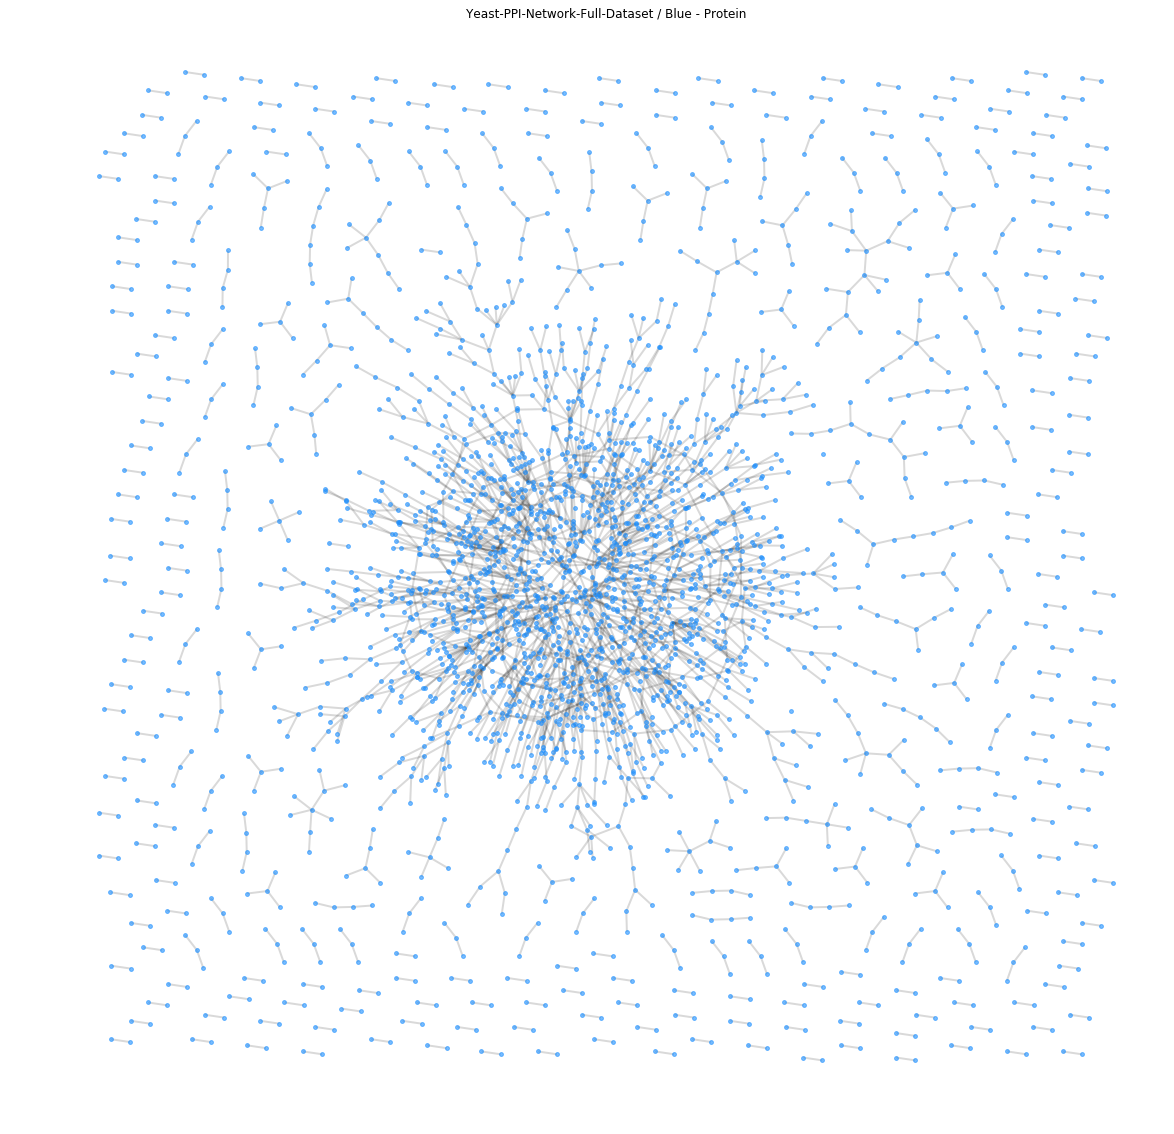

In [29]:
# How to Visualize Graph?
import numpy as np
import matplotlib.pyplot as plt

title = "Yeast-PPI-Network-Full-Dataset"
plt.figure(figsize=(20,20))
node_size = 15
node_alpha = .6

edge_color = '#483D8B'
edge_alpha = 0.15
edge_style = 'dashed'
edge_width = 2

protein_node_color = "#F08080"
rna_node_color = "#1E90FF"

pos = nx.drawing.nx_agraph.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=rna_node_color, alpha=node_alpha)
nx.draw_networkx_edges(G, pos, width=edge_width, alpha=edge_alpha)
plt.axis('off')
plt.savefig("{}.png".format(title))
plt.title("{} / Blue - Protein".format(title))
plt.show()

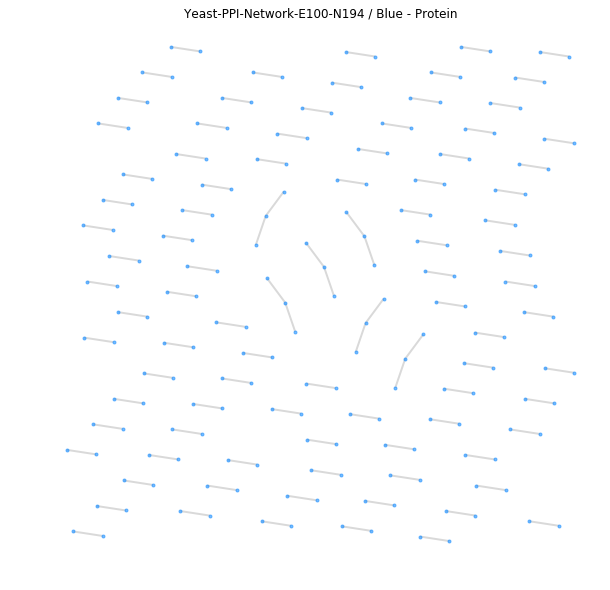

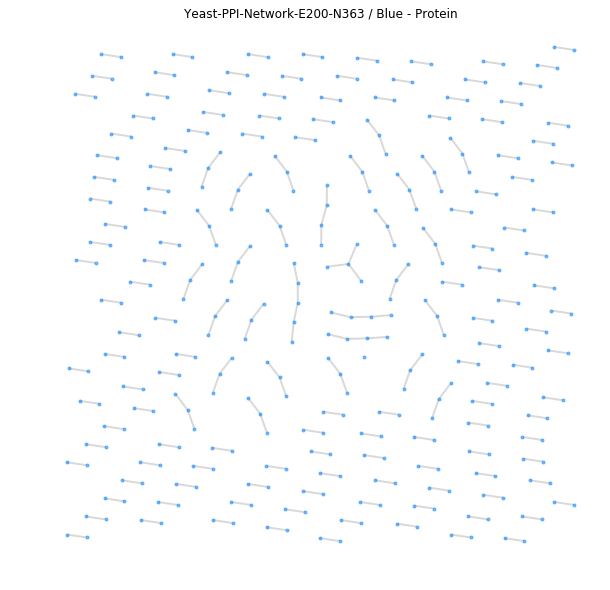

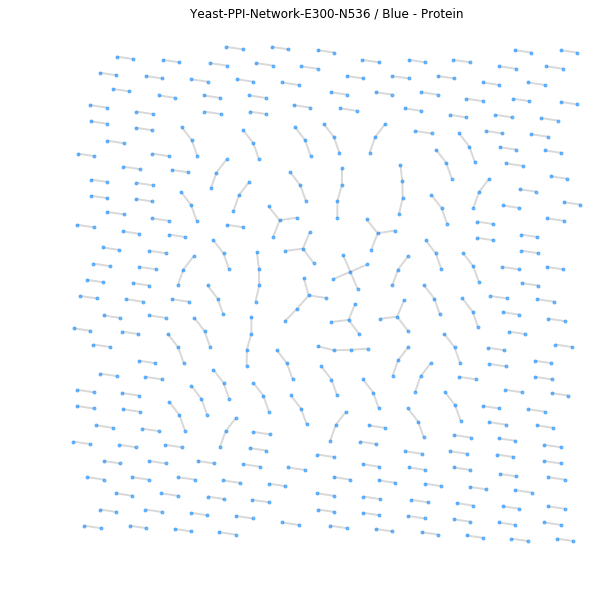

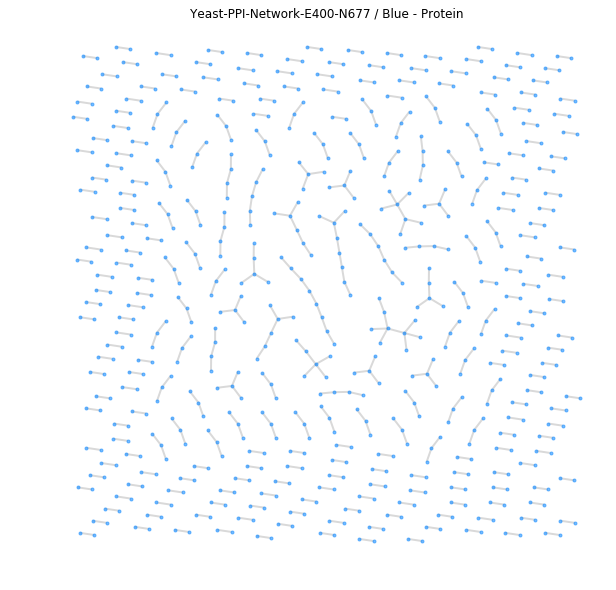

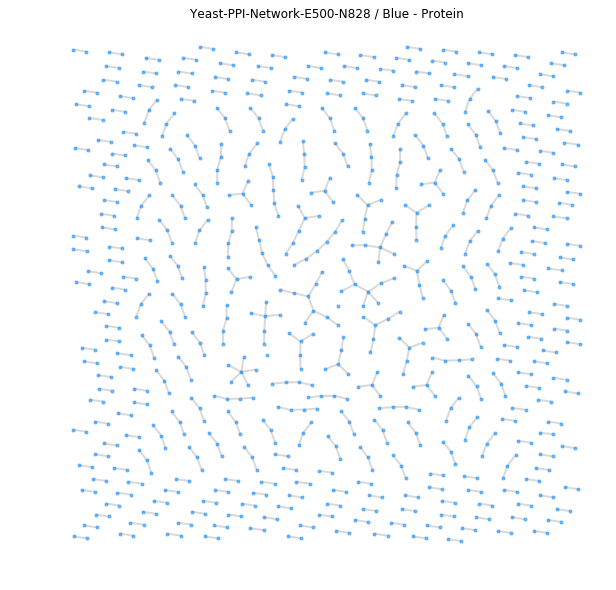

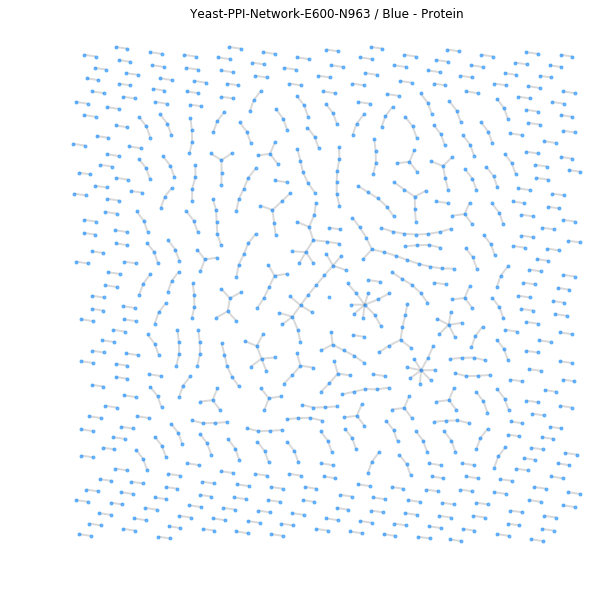

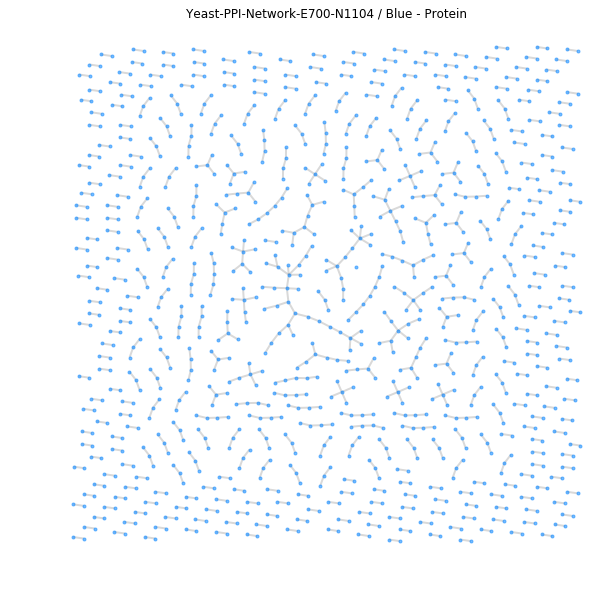

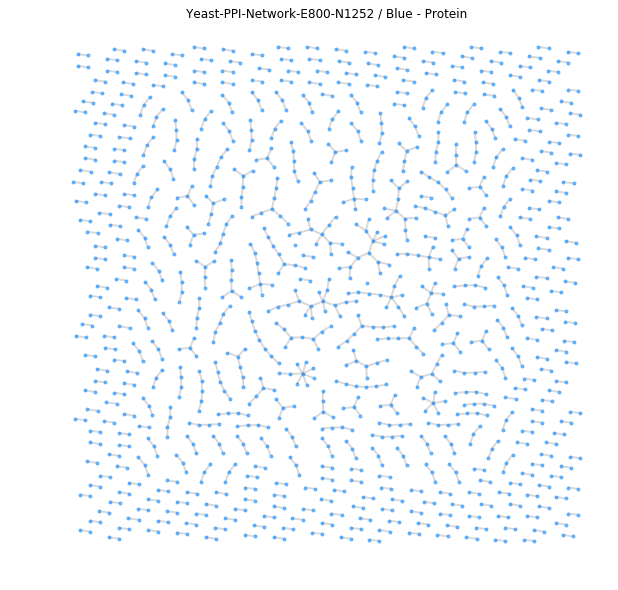

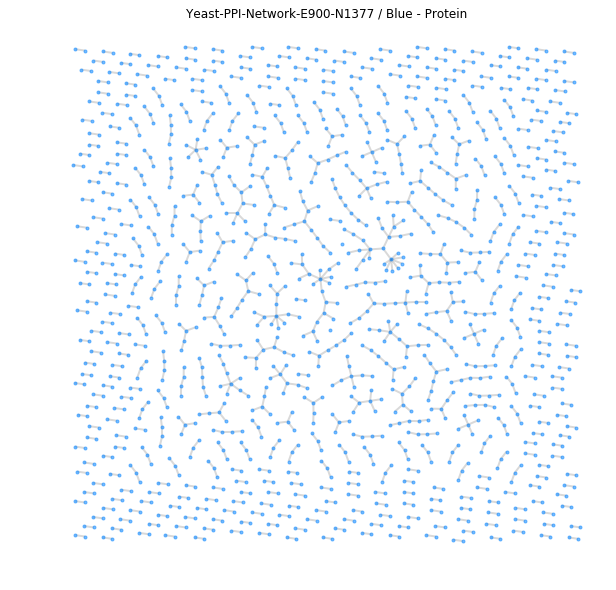

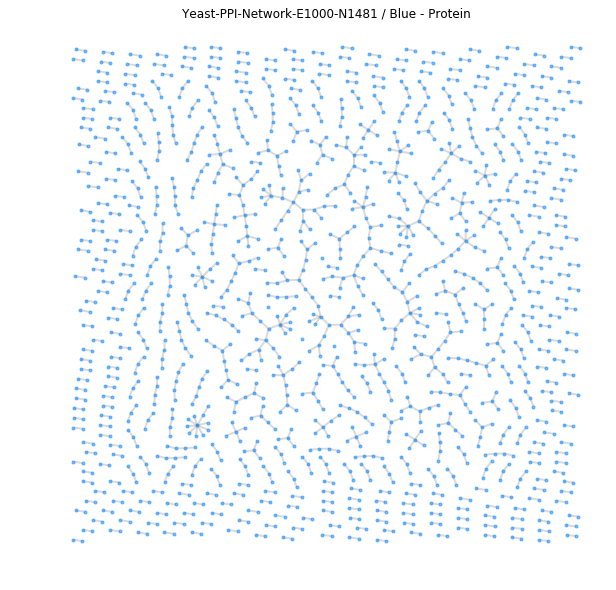

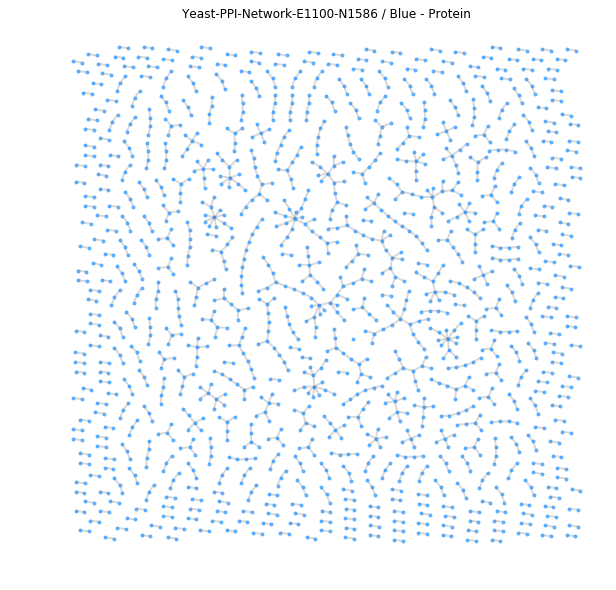

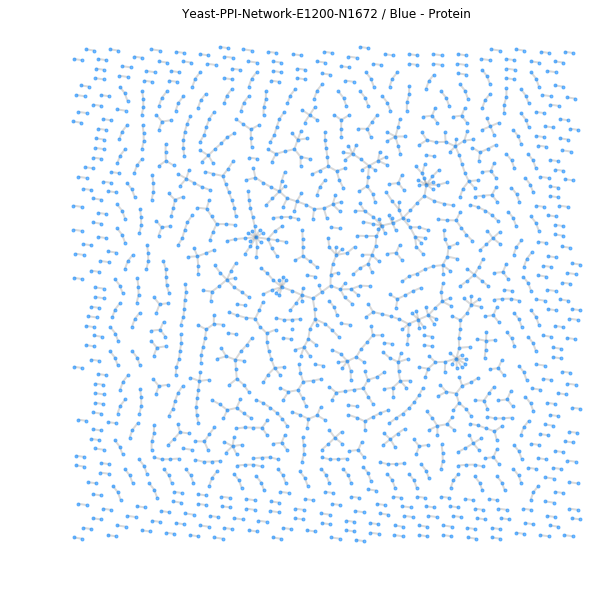

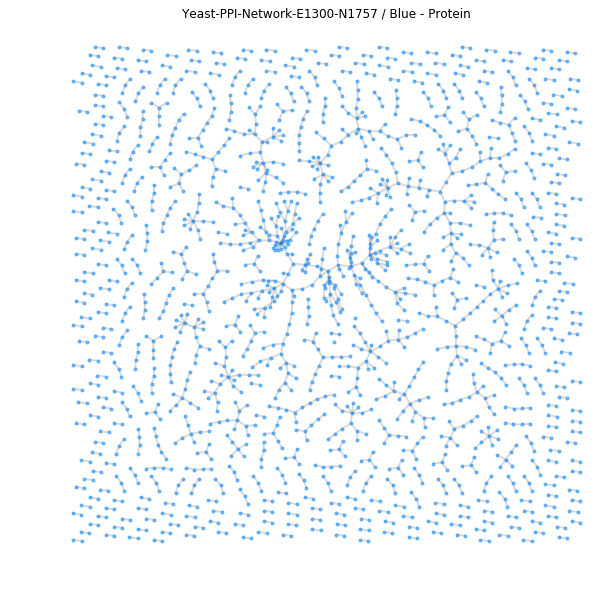

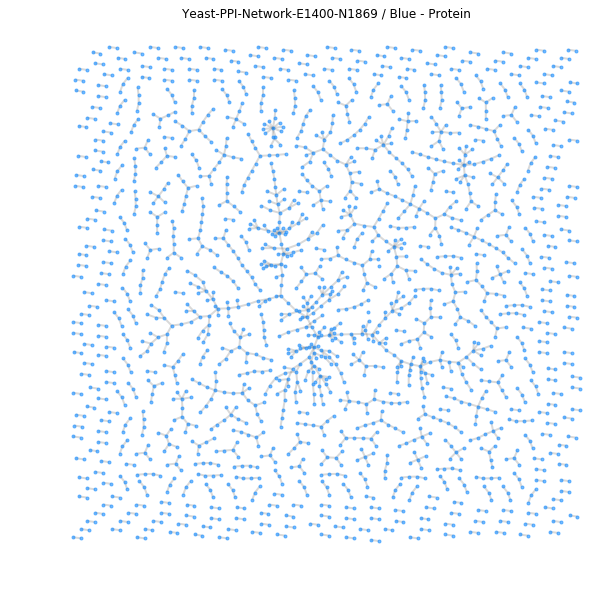

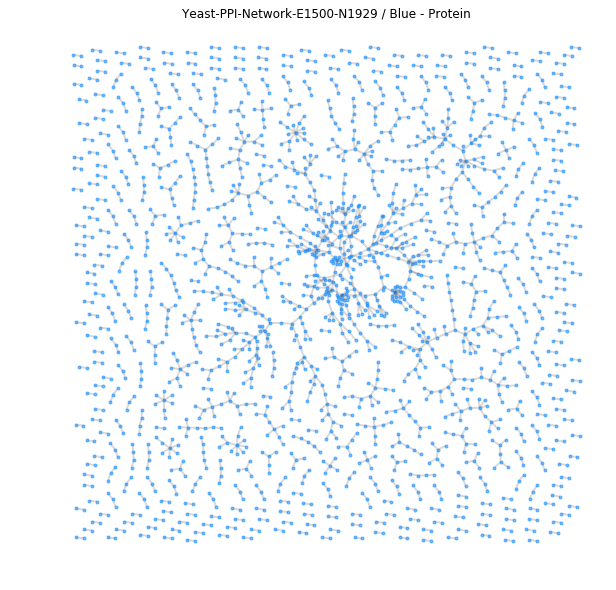

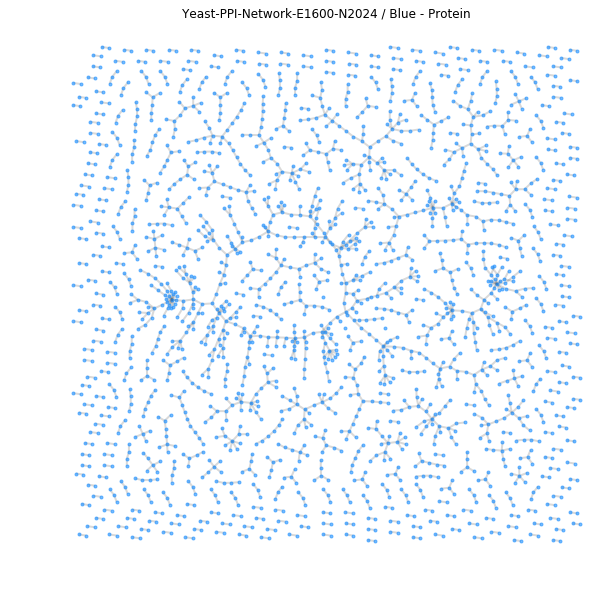

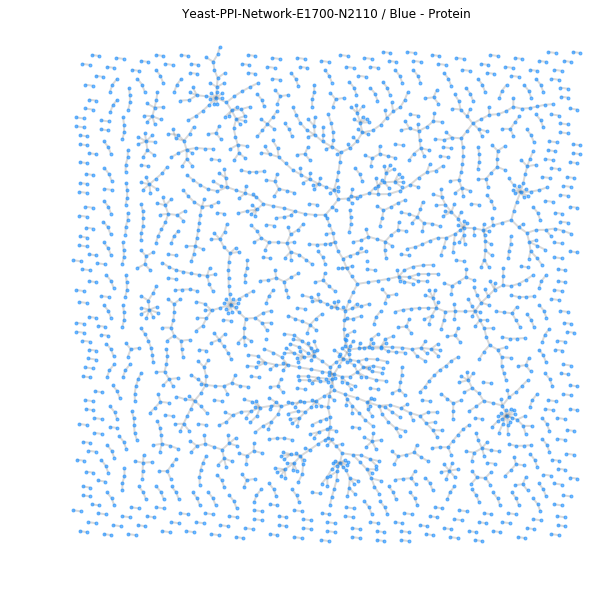

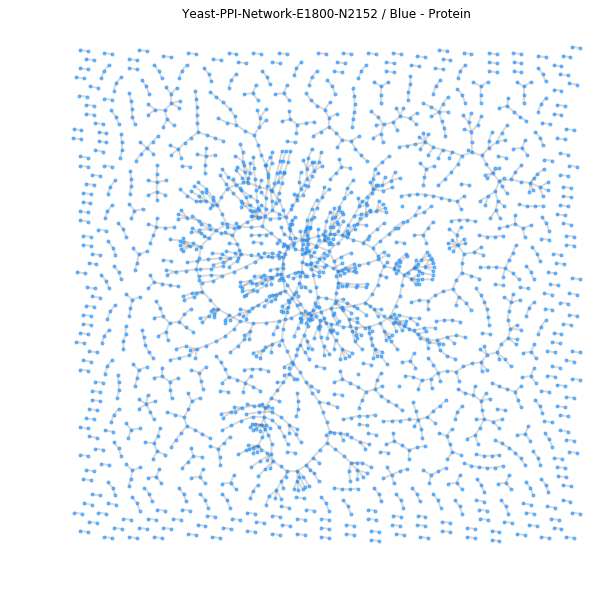

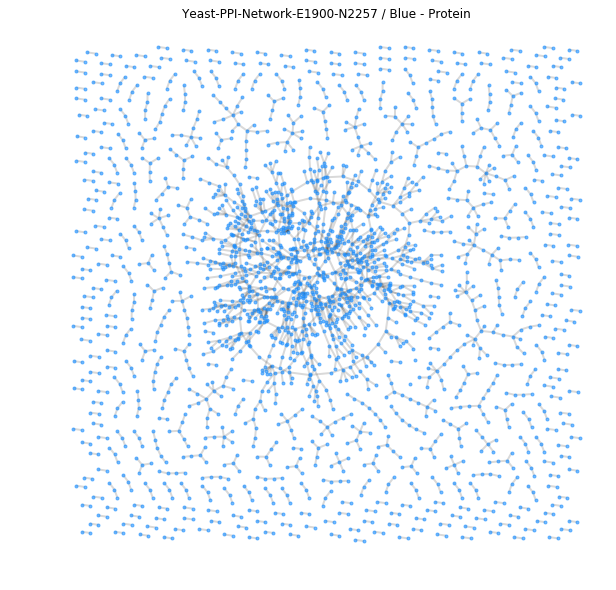

In [34]:
def example_visualize_sampled_yeast_ppi_network(sample_edges=500):
    # Load Sampled Graph dataset
    edge_path = "yeast.reduced.edgelist"
    edge_list, node_list = load_edge_list(edge_path, num_edges=sample_edges)
    G = nx.Graph()
    G.add_nodes_from(node_list)
    G.add_edges_from(edge_list)
    
    # Visualize
    title = "Yeast-PPI-Network-E{}-N{}".format(len(G.edges), len(G.nodes))
    plt.figure(figsize=(10,10))
    node_size = 9
    node_alpha = .6

    edge_color = '#483D8B'
    edge_alpha = 0.15
    edge_style = 'dashed'
    edge_width = 2

    protein_node_color = "#F08080"
    rna_node_color = "#1E90FF"

    pos = nx.drawing.nx_agraph.graphviz_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=rna_node_color, alpha=node_alpha)
    nx.draw_networkx_edges(G, pos, width=edge_width, alpha=edge_alpha)
    plt.axis('off')
    plt.savefig("imgs/{}.png".format(title))
    plt.title("{} / Blue - Protein".format(title))
    plt.show()
    
for i in range(100, 2000, 100):
    example_visualize_sampled_yeast_ppi_network(sample_edges=i)